# Inference on Sentinel-2 `SAFE` files

* **Last Modified**: 23-04-2021
* **Authors**: Gonzalo Mateo-García
---

This notebook shows how to download Sentinel-2 images from Copernicus Open Hub over an area of interest (AoI). We will read the images and run inference on them. We will use the `sentinelsat` package to download the images and the `ml4floods.data.S2_SAFE_reader` to read the `SAFE` files.

In [ ]:
# install ml4floods
!pip install git+https://github.com/spaceml-org/ml4floods#egg=ml4floods

## Step 0: Install `sentinelsat` to download images from Copernicus Open Hub

In [ ]:
!pip install sentinelsat

## Step 1: Define Area of Interest and dates to search products

In [16]:
from shapely.geometry import shape
from datetime import datetime, timedelta
import os
import rasterio.warp

date_event = datetime.strptime("2021-02-12","%Y-%m-%d")

date_start_search = date_event
date_end_search = date_start_search + timedelta(days=10)

area_of_interest_geojson = {'type': 'Polygon',
 'coordinates': (((19.483318354000062, 41.84407200000004),
   (19.351701478000052, 41.84053242300007),
   (19.298659824000026, 41.871157520000054),
   (19.236388306000038, 41.89588351100008),
   (19.22956438700004, 42.086957306000045),
   (19.327827977000027, 42.09102668200006),
   (19.778082109000025, 42.10312055000003),
   (19.777652446000047, 41.97309238100007),
   (19.777572772000042, 41.94912981900006),
   (19.582705341000064, 41.94398333100003),
   (19.581417139000052, 41.94394820700006),
   (19.54282145700006, 41.90168177700008),
   (19.483318354000062, 41.84407200000004)),)}

area_of_interest = shape(area_of_interest_geojson)

## Step 2: Query Sentinel-2 products

In [3]:
from sentinelsat.sentinel import SentinelAPI
api = SentinelAPI('USERNAME', 'PASSWORD', 'https://scihub.copernicus.eu/apihub')

In [8]:
products = api.query(area=str(area_of_interest),
                     date=(date_start_search, date_end_search),
                     platformname='Sentinel-2',
                     producttype='S2MSI1C',
                     cloudcoverpercentage=(0, 40))

In [9]:
products_gpd = api.to_geodataframe(products)
products_gpd

/home/gonzalo/miniconda3/envs/ml4fl_py38/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,datastripidentifier,granuleidentifier,uuid,geometry
7855c95e-6e00-4a7d-ba8c-7f8ad5f7beca,S2B_MSIL1C_20210218T094029_N0209_R036_T34TCM_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-02-18T09:40:29.024Z, Instrument: MS...",false,2021-02-18 09:40:29.024,2021-02-18 09:40:29.024,2021-02-18 09:40:29.024,2021-02-18 16:09:49.943,...,S2MSI1C,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20210218T094029_N0209_R036_T34TCM_2...,S2B_OPER_MSI_L1C_DS_VGS2_20210218T115327_S2021...,S2B_OPER_MSI_L1C_TL_VGS2_20210218T115327_A0206...,7855c95e-6e00-4a7d-ba8c-7f8ad5f7beca,"MULTIPOLYGON (((18.60606 41.43884, 19.65397 41..."
6c813d56-a984-40bd-8752-bee7cbc81146,S2B_MSIL1C_20210215T093029_N0209_R136_T34TCM_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-02-15T09:30:29.024Z, Instrument: MS...",false,2021-02-15 09:30:29.024,2021-02-15 09:30:29.024,2021-02-15 09:30:29.024,2021-02-15 15:44:55.930,...,S2MSI1C,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20210215T093029_N0209_R136_T34TCM_2...,S2B_OPER_MSI_L1C_DS_EPAE_20210215T105122_S2021...,S2B_OPER_MSI_L1C_TL_EPAE_20210215T105122_A0206...,6c813d56-a984-40bd-8752-bee7cbc81146,"MULTIPOLYGON (((18.60606 41.43884, 19.91997 41..."


<AxesSubplot:>

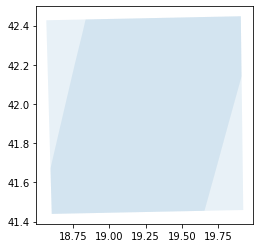

In [12]:
products_gpd.plot(alpha=.1)

In [14]:
product_to_download = products_gpd.iloc[1] # get 2 row of the table
product_to_download

title                       S2B_MSIL1C_20210215T093029_N0209_R136_T34TCM_2...
link                        https://scihub.copernicus.eu/apihub/odata/v1/P...
link_alternative            https://scihub.copernicus.eu/apihub/odata/v1/P...
link_icon                   https://scihub.copernicus.eu/apihub/odata/v1/P...
summary                     Date: 2021-02-15T09:30:29.024Z, Instrument: MS...
ondemand                                                                false
datatakesensingstart                               2021-02-15 09:30:29.024000
beginposition                                      2021-02-15 09:30:29.024000
endposition                                        2021-02-15 09:30:29.024000
ingestiondate                                      2021-02-15 15:44:55.930000
generationdate                                            2021-02-15 10:51:22
orbitnumber                                                             20611
relativeorbitnumber                                             

## Step 3: download and unzip the Sentinel-2 image

In [17]:
folder_download = "S2SAFE_PRODUCTS"
os.makedirs(folder_download,exist_ok=True)
uuid = product_to_download["uuid"] 
product = api.download(uuid, folder_download)
if not product["Online"]:
    print("File is not available try with newest dates")

Downloading: 100%|██████████| 750M/750M [05:41<00:00, 2.20MB/s] 
MD5 checksumming: 100%|██████████| 750M/750M [00:12<00:00, 58.5MB/s] 


In [20]:
# unzip the file
import zipfile

file_name = os.path.join(folder_download, product_to_download["title"] + ".zip")
assert os.path.exists(file_name), f"Product expected name {file_name} not found"

# Exctract the file
zip_ref = zipfile.ZipFile(file_name, "r")
zip_ref.extractall(folder_download)
zip_ref.close()

# 
s2_safe_folder = os.path.join(
    folder_download, os.path.basename(os.path.splitext(file_name)[0])+".SAFE")

assert os.path.exists(s2_safe_folder), f"Folder {s2_safe_folder} not found"

## Step 4: read the image over the AoI polygon

In [24]:
from ml4floods.data import S2_SAFE_reader
s2obj = S2_SAFE_reader.s2loader(s2_safe_folder, out_res=10) 
s2obj.crs, s2obj.transform, s2obj, s2obj.polygon()

(CRS.from_epsg(32634),
 Affine(10.0, 0.0, 300000.0,
        0.0, -10.0, 4700040.0),
 <shapely.geometry.polygon.Polygon at 0x7f9267edf220>)

In [26]:
# Get bounds of the polygon in CRS of S2 image
bounds_pol_read = area_of_interest.bounds
bounds_pol_read_s2crs =rasterio.warp.transform_bounds({'init': 'epsg:4326'},
                                                      s2obj.crs,
                                                      *bounds_pol_read)

# Read the data (all bands will be reprojected to out_res)
data, transform = s2obj.load_bands_bbox(bounds_pol_read_s2crs)
data.shape,transform

((13, 2995, 4596),
 Affine(10.0, 0.0, 353008.60473929264,
        0.0, -10.0, 4662742.335279502))

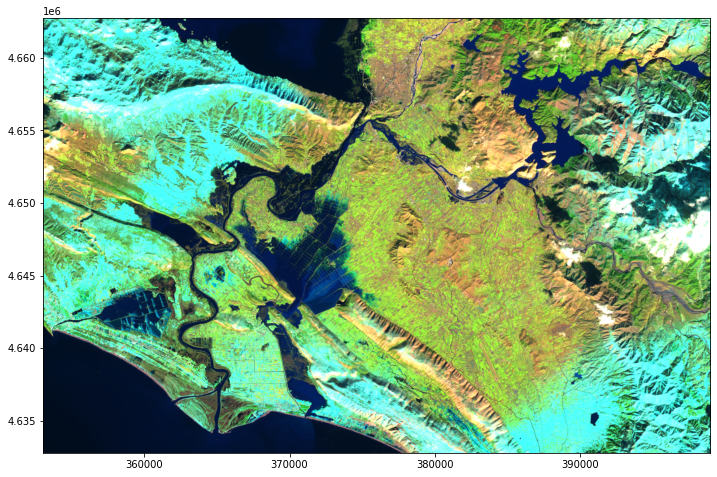

In [29]:
import matplotlib.pyplot as plt
from ml4floods.visualization import plot_utils

plt.figure(figsize=(12,8))
plot_utils.plot_swirnirred_image(data, transform=transform)

## Step 5: Run inference on the image

Now we're going to run inference on the Sentinel-2 image. See the [Run inference notebook](./HOWTO_Run_Inference_on_new_data.ipynb) for a detailed tutorial on this.

If you're running this tutorial in Google Colab you need to *‘add a shortcut to your Google Drive’* from the [public Google Drive folder](https://drive.google.com/folderview?id=1dqFYWetX614r49kuVE3CbZwVO6qHvRVH):

![add_shortcut_drive.png](../prep/images/add_shortcut_drive.png)

In [ ]:
experiment_name = "WFV1_unet"
try:
    from google.colab import drive
    drive.mount('/content/drive')
    assert os.path.exists('/content/drive/My Drive/Public WorldFloods Dataset'), "Add a shortcut to the publice Google Drive folder: https://drive.google.com/drive/u/0/folders/1dqFYWetX614r49kuVE3CbZwVO6qHvRVH"
    google_colab = True
    path_to_dataset_folder = '/content/drive/My Drive/Public WorldFloods Dataset'
    dataset_folder = os.path.join(path_to_dataset_folder, "worldfloods_v1_0_sample")
    folder_name_model_weights = os.path.join(path_to_dataset_folder, experiment_name)
except ImportError as e:
    print(e)
    path_to_dataset_folder = 'worldfloods_v1_0_sample'
    folder_name_model_weights = os.path.join(path_to_dataset_folder, experiment_name)
    
    if not os.path.exists(folder_name_model_weights):
        import gdown
        os.makedirs(folder_name_model_weights, exists_ok=True)
        gdown.download_folder(id="1Oup-qVD1U-re3lIQkw7TOKJsdu90blsk", quiet=False, use_cookies=False,
                              output=folder_name_model_weights) 

### Step 5a: load the `inference_function`

In [31]:
from ml4floods.models.config_setup import get_default_config
from ml4floods.models.model_setup import get_model
from ml4floods.models.model_setup import get_model_inference_function

config_fp = os.path.join(folder_name_model_weights,"config.json")
config = get_default_config(config_fp)


config["model_params"]["max_tile_size"] = 128

config["model_params"]['model_folder'] = path_to_dataset_folder
config["model_params"]['test'] = True
model = get_model(config.model_params, experiment_name)
model.to("cuda")

inference_function = get_model_inference_function(model, config,apply_normalization=True)

Loaded Config for experiment:  WFV1_unet
{   'data_params': {   'batch_size': 32,
                       'bucket_id': 'ml4floods',
                       'channel_configuration': 'all',
                       'filter_windows': False,
                       'input_folder': 'S2',
                       'loader_type': 'local',
                       'num_workers': 8,
                       'path_to_splits': '/worldfloods/public',
                       'target_folder': 'gt',
                       'test_transformation': {   'normalize': True,
                                                  'num_classes': 3,
                                                  'totensor': True},
                       'train_test_split_file': 'worldfloods/public/train_test_split.json',
                       'train_transformation': {   'normalize': True,
                                                   'num_classes': 3,
                                                   'totensor': True},
                

### Step 5b: Run inference and plot the results

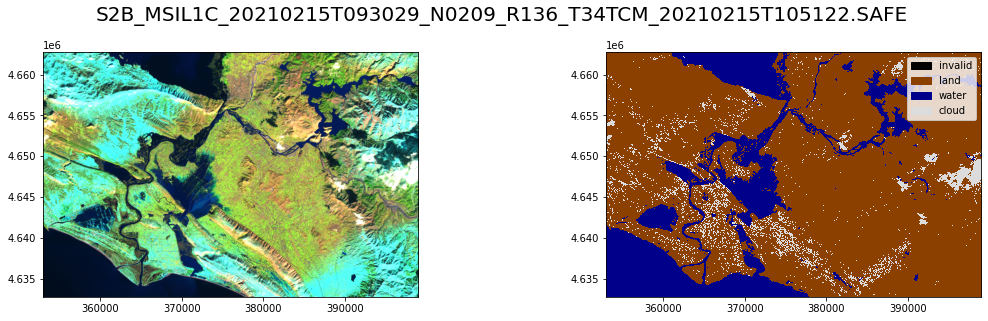

In [41]:
import torch
from ml4floods.models import postprocess
import geopandas as gpd
import numpy as np

# Run inference on read data
torch_inputs = torch.tensor(data)
outputs = inference_function(torch_inputs.unsqueeze(0))[0] # (batch_size, num_classes, h, w)
prob_water_mask = outputs[1].cpu().numpy()
binary_water_mask = prob_water_mask>.5
prediction = torch.argmax(outputs, dim=0).long() # (batch_size, h, w)
mask_invalid = torch.all(torch_inputs == 0, dim=0)
prediction+=1
prediction[mask_invalid] = 0

# Vectorize the output
geoms_polygons = postprocess.get_water_polygons(binary_water_mask, transform=transform)
vectorized_dataframe = gpd.GeoDataFrame({"geometry": geoms_polygons, "id": np.arange(len(geoms_polygons))})

# Plot results
fig, axs = plt.subplots(1,2, figsize=((16,4.5)))
plot_utils.plot_swirnirred_image(data, transform=transform, ax=axs[0])
plot_utils.plot_gt_v1(prediction.unsqueeze(0),transform=transform, ax=axs[1])
fig.suptitle(os.path.basename(s2_safe_folder),fontsize=20)
plt.tight_layout()

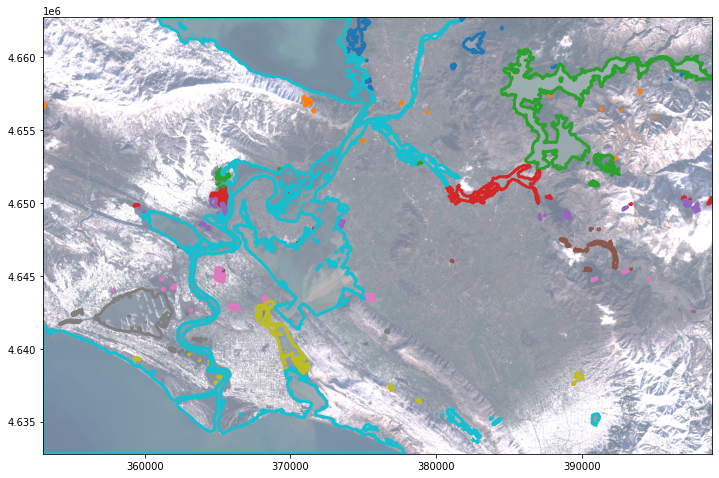

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12, 12))
vectorized_dataframe.plot("id",legend=False,categorical=True,ax=ax,facecolor="None",edgecolor="1",linewidth=3)
plot_utils.plot_rgb_image(data, transform=transform, ax=ax, alpha=.6,
                             channel_configuration="all")